#Instructions#

Predicting Diabetes
This dataset originally comes from the National Institute of Diabetes and Digestive and Kidney Diseases. The goal is to predict, based on diagnostic measures, whether or not a patient has diabetes.

###Step 1: Loading the dataset###


In [1]:
import pandas as pd
import numpy as np

In [2]:
URL="https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv"

In [3]:
data=pd.read_csv(URL)

In [4]:
#Pregnancies. Number of pregnancies of the patient (numeric)
#Glucose. Plasma glucose concentration 2 hours after an oral glucose tolerance test (numeric)
#BloodPressure. Diastolic blood pressure (measured in mm Hg) (numeric)
#SkinThickness. Triceps skin fold thickness (measured in mm) (numeric)
#Insulin. 2-hour serum insulin (measured in mu U/ml) (numeric)
#BMI. Body mass index (numeric)
#DiabetesPedigreeFunction. Diabetes Pedigree Function (numeric)
#Age. Age of patient (numeric)
#Outcome. Class variable (0 or 1), being 0 negative in diabetes and 1 positive (numeric)

data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


###Step 2: Perform a full EDA###


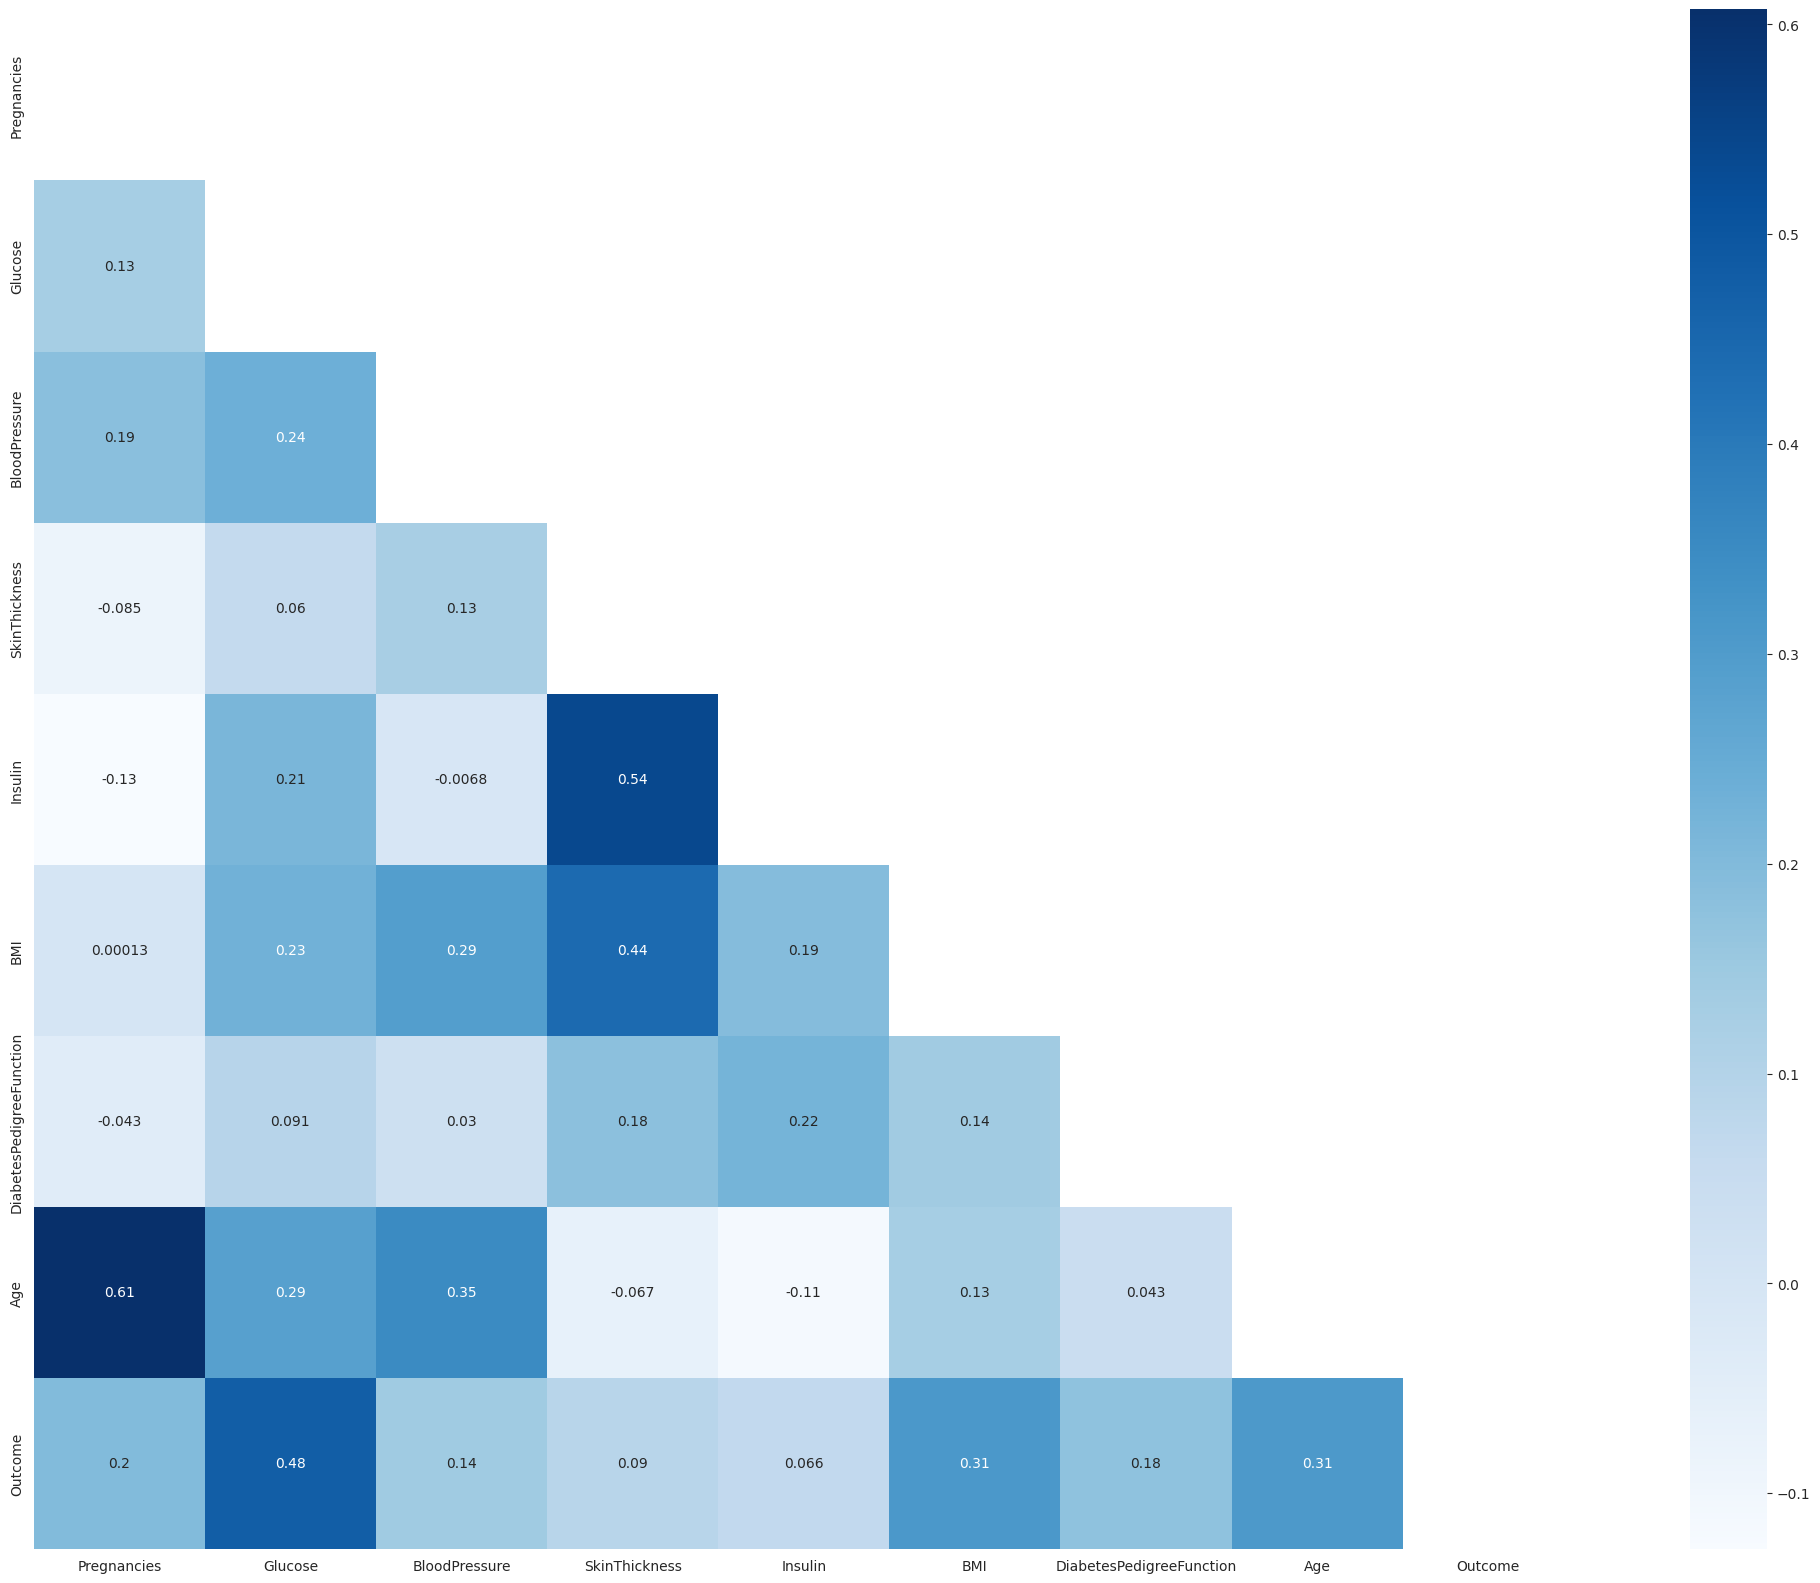

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

corrMatrix = data.corr(method='spearman')
mask = np.zeros_like(corrMatrix)
mask[np.triu_indices_from(mask)] = True
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(30, 20))
    ax = sns.heatmap(corrMatrix, mask=mask, square=True, annot=True, cmap="Blues")

In [6]:
data1=data.drop('Age', axis=1)

In [7]:
data1.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Outcome
0,6,148,72,35,0,33.6,0.627,1
1,1,85,66,29,0,26.6,0.351,0
2,8,183,64,0,0,23.3,0.672,1
3,1,89,66,23,94,28.1,0.167,0
4,0,137,40,35,168,43.1,2.288,1


###Step 3: Build a decision tree###

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
y=data1['Outcome']

In [10]:
X=data1.drop('Outcome', axis=1)

In [11]:
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.2, random_state=42)

In [30]:
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(max_depth=4,random_state = 42)
model.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

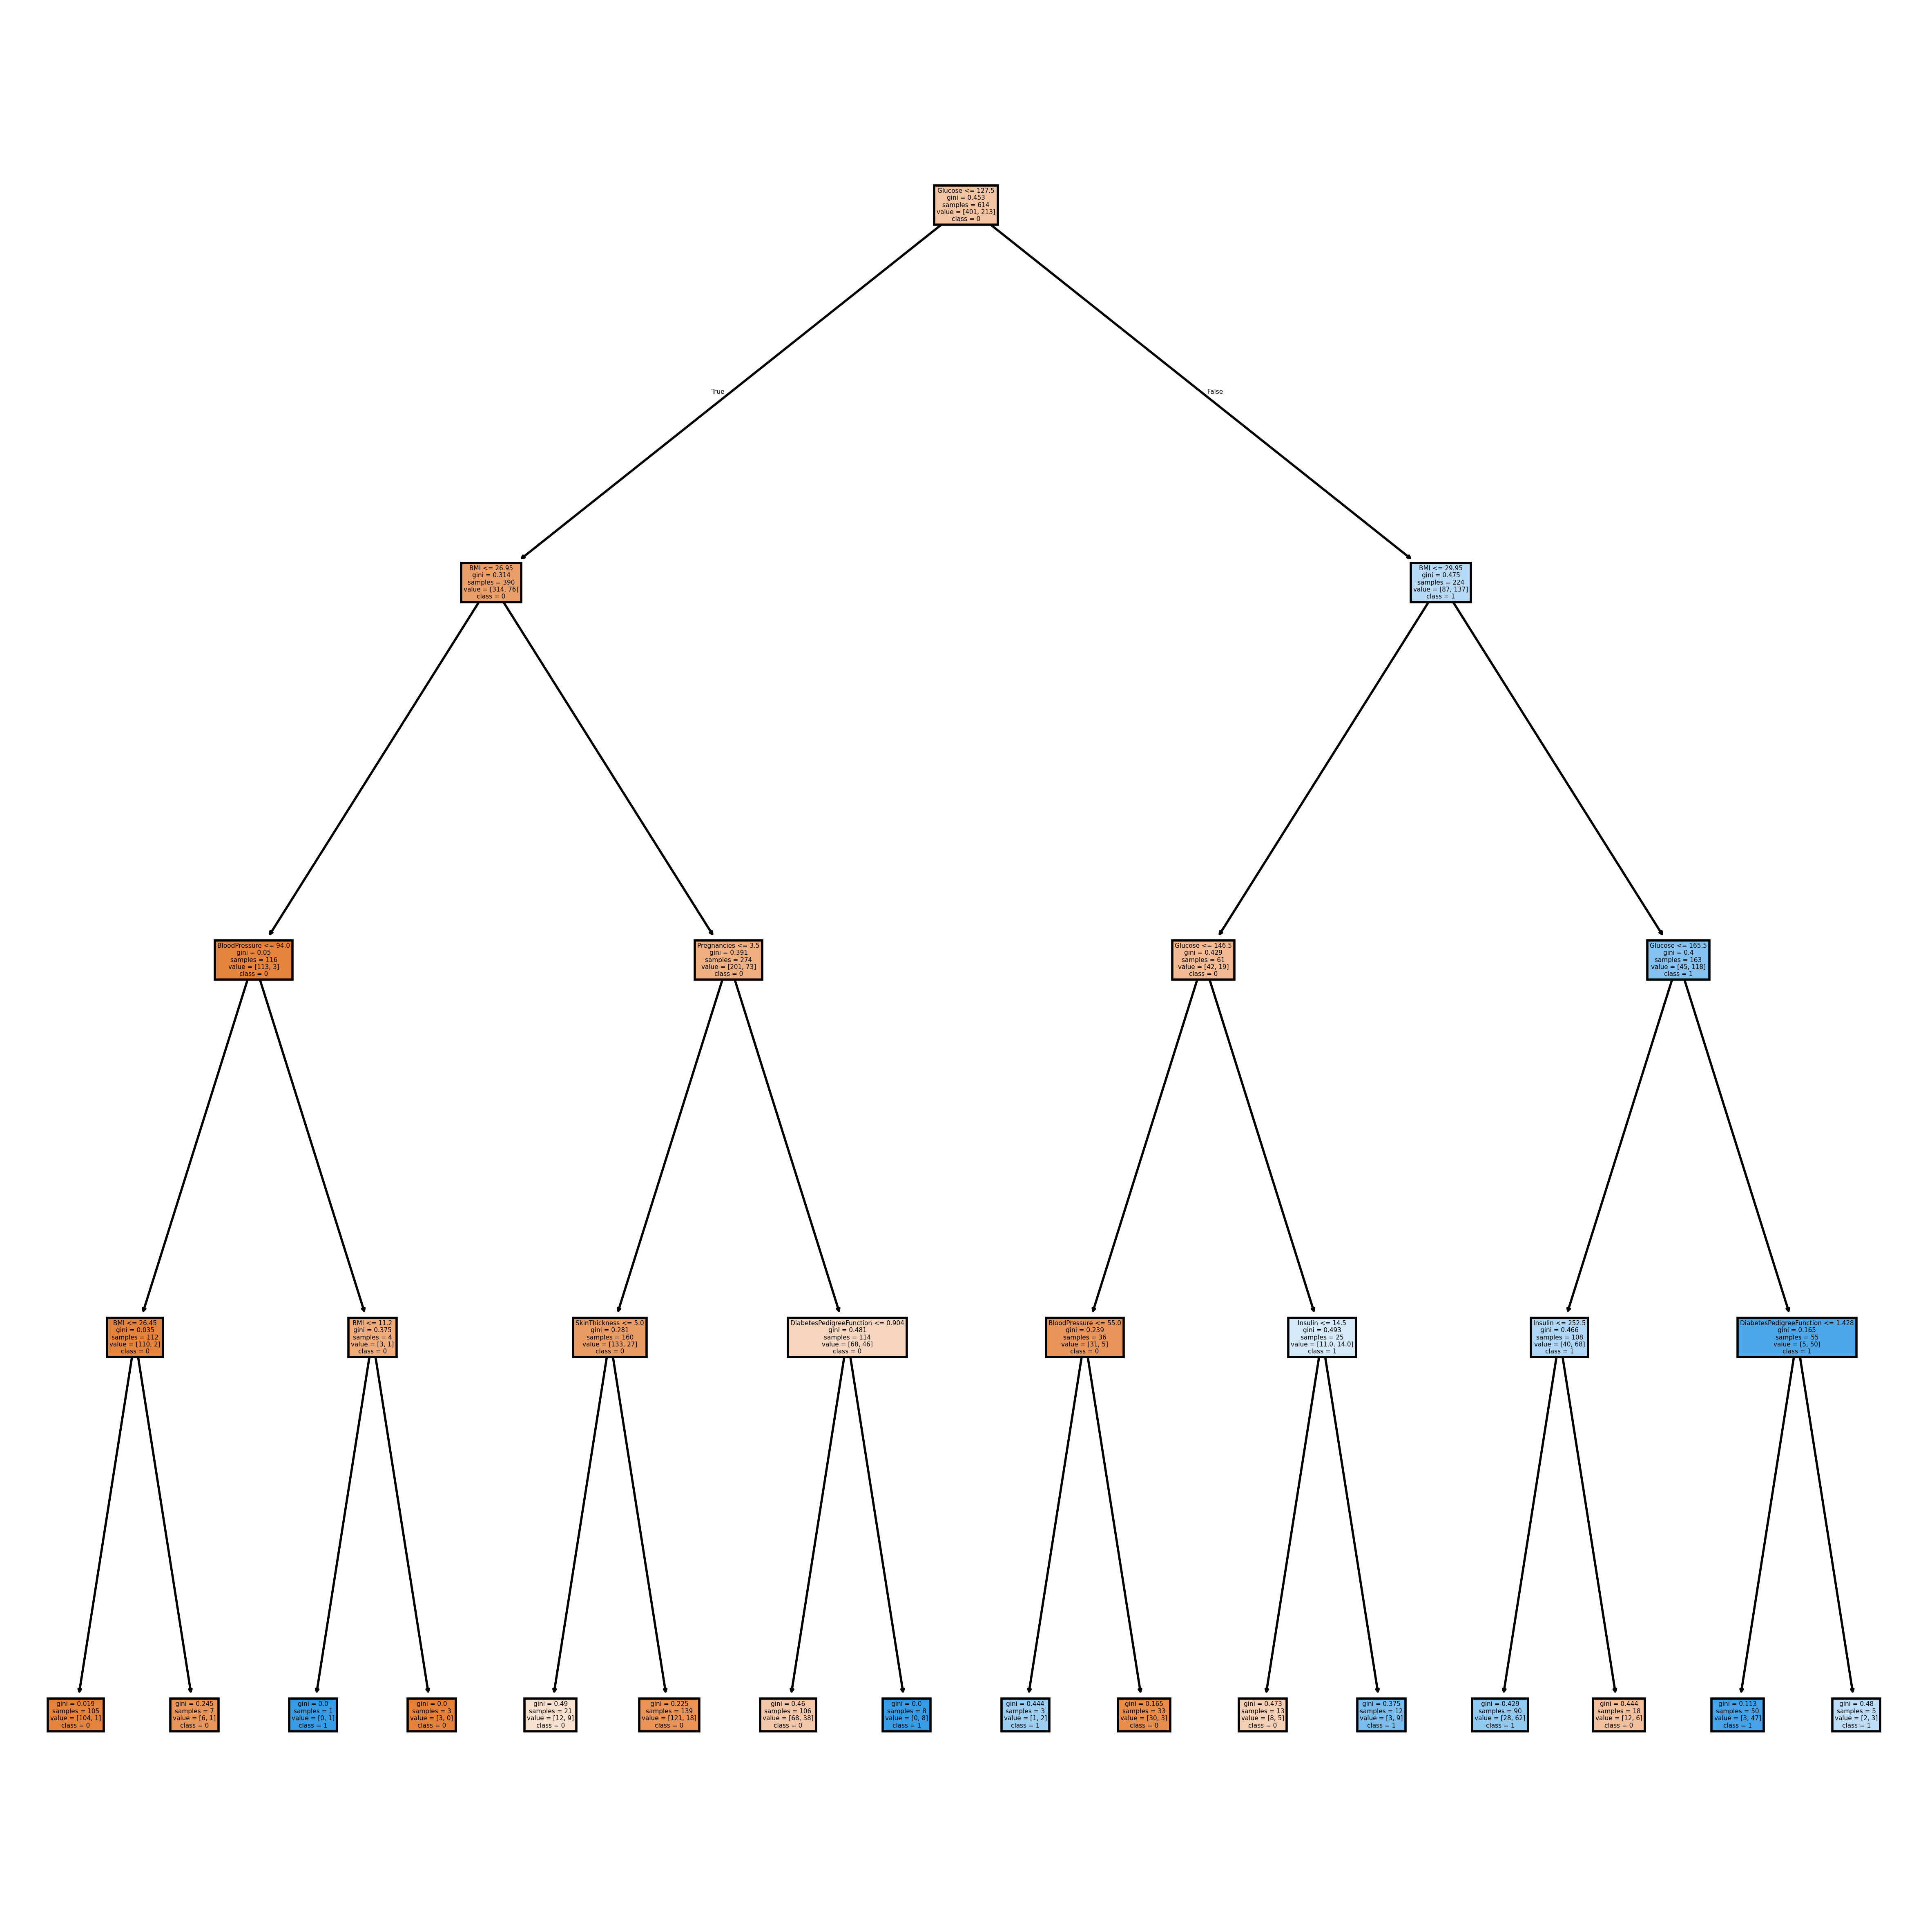

In [31]:
import matplotlib.pyplot as plt
from sklearn import tree

fig = plt.figure(figsize=(15,15), dpi=400)

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)

plt.show()

In [32]:
y_pred = model.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0])

In [33]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.7792207792207793

###Step 4: Optimize the previous model###

I optimized the previous model, changing just de max_depth. We could use a GridSearch to try with more hyperparameters.

###Step 5: Save the model###

In [35]:
from pickle import dump

In [36]:
dump(model, open("decision_tree_regressor_default_42.sav", "wb"))